In [1]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator ,load_img
from keras.layers.normalization import BatchNormalization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [3]:
#Importing Data from CSV file
data=pd.read_csv(r'C:\Users\chait\OneDrive\Desktop\different fer2013 dataset\fer2013.csv')

In [4]:
labels=data.iloc[:,[0]].values

In [5]:
pixels=data['pixels']

In [6]:
#Facial Expressions
Expressions={0:"Angry",1:"Disgust",2:"Fear",3:"Happy",4:"Sad",5:"Surprise",6:"Neutral"}
from keras.utils import to_categorical 
labels = to_categorical(labels,len(Expressions))

In [7]:
#converting pixels to Gray Scale images of 48X48 
images = np.array([np.fromstring(pixel, dtype=int, sep=" ")for pixel in pixels])
images=images/255.0
images = images.reshape(images.shape[0],48,48,1).astype('float32')

'Disgust'

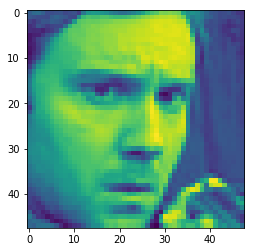

In [8]:
plt.imshow(images[0][:,:,0])
Expressions[labels[0][0]]

In [9]:
#splitting data into training and test data
train_images,test_images,train_labels,test_labels = train_test_split(images,labels,test_size=0.2,random_state=0)

In [10]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
def create_convolutional_model(classes):
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(48,48,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))#to prevent neural network from overfitting
    
    model.add(Conv2D(filters=128,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=256,kernel_size=(2,2),strides=(1,1),activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(256,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(512,activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Dense(classes,activation='softmax'))
    
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [12]:
classes=7
model = create_convolutional_model(classes)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 47, 47, 32)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
batch_normalization_1 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 64)        0

In [13]:
#train the CNN 
model.fit(train_images,train_labels,batch_size=105,epochs=30,verbose=2)

Epoch 1/30
274/274 - 583s - loss: 1.8800 - accuracy: 0.3279
Epoch 2/30
274/274 - 594s - loss: 1.4562 - accuracy: 0.4521
Epoch 3/30
274/274 - 695s - loss: 1.2990 - accuracy: 0.5072
Epoch 4/30
274/274 - 542s - loss: 1.1910 - accuracy: 0.5469
Epoch 5/30
274/274 - 543s - loss: 1.1172 - accuracy: 0.5763
Epoch 6/30
274/274 - 540s - loss: 1.0539 - accuracy: 0.6003
Epoch 7/30
274/274 - 541s - loss: 0.9816 - accuracy: 0.6314
Epoch 8/30
274/274 - 539s - loss: 0.9061 - accuracy: 0.6610
Epoch 9/30
274/274 - 538s - loss: 0.8315 - accuracy: 0.6900
Epoch 10/30
274/274 - 536s - loss: 0.7773 - accuracy: 0.7091
Epoch 11/30
274/274 - 540s - loss: 0.6844 - accuracy: 0.7474
Epoch 12/30
274/274 - 538s - loss: 0.5900 - accuracy: 0.7855
Epoch 13/30
274/274 - 538s - loss: 0.5073 - accuracy: 0.8176
Epoch 14/30
274/274 - 539s - loss: 0.4473 - accuracy: 0.8391
Epoch 15/30
274/274 - 537s - loss: 0.3890 - accuracy: 0.8610
Epoch 16/30
274/274 - 538s - loss: 0.3356 - accuracy: 0.8792
Epoch 17/30
274/274 - 537s - loss

In [14]:
label_pred=model.predict(test_images)
label_pred=np.argmax(label_pred,axis = 1)

Normalized confusion matrix
[[5.16129032e-01 6.24349636e-03 7.28407908e-02 6.97190427e-02
  2.16441207e-01 1.87304891e-02 9.98959417e-02]
 [1.98113208e-01 4.62264151e-01 8.49056604e-02 5.66037736e-02
  1.13207547e-01 2.83018868e-02 5.66037736e-02]
 [1.43141153e-01 1.98807157e-03 3.86679920e-01 4.27435388e-02
  2.69383698e-01 7.35586481e-02 8.25049702e-02]
 [5.17147523e-02 5.44365814e-04 1.95971693e-02 7.81709309e-01
  6.80457267e-02 2.28633642e-02 5.55253130e-02]
 [1.26090404e-01 3.17208565e-03 8.48532910e-02 6.18556701e-02
  5.81284695e-01 1.82394925e-02 1.24504362e-01]
 [4.38047559e-02 1.25156446e-03 9.63704631e-02 4.88110138e-02
  5.50688360e-02 7.30913642e-01 2.37797247e-02]
 [1.05132450e-01 2.48344371e-03 5.62913907e-02 8.52649007e-02
  2.42549669e-01 2.73178808e-02 4.80960265e-01]]


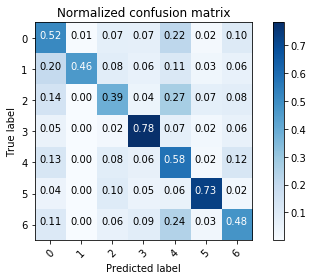

In [15]:
#making confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

test_labels=np.argmax(test_labels,axis=1)
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_labels,label_pred)
class_names=Expressions
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [16]:
#saving model
model_weights_json=model.to_json()
with open("model_weights.json","w") as json_file:
          json_file.write(model_weights_json)

In [17]:
#Save the weights
filename='model_weights.hdf5'
model.save_weights(filename,overwrite=True)